In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [3]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2991 - accuracy: 0.9167
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1352 - accuracy: 0.9601
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0949 - accuracy: 0.9725
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0727 - accuracy: 0.9787
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0574 - accuracy: 0.9825


In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9729
Test accuracy: 0.9728999733924866


In [6]:
predictions = model.predict(test_images)
predicted_classes = predictions.argmax(axis=1)

print(f"\nClassification Report : \n{classification_report(test_labels.argmax(axis=1), predicted_classes)}")

313/313 [==============================] - 1s 2ms/step

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.94      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.95      0.98      0.96       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



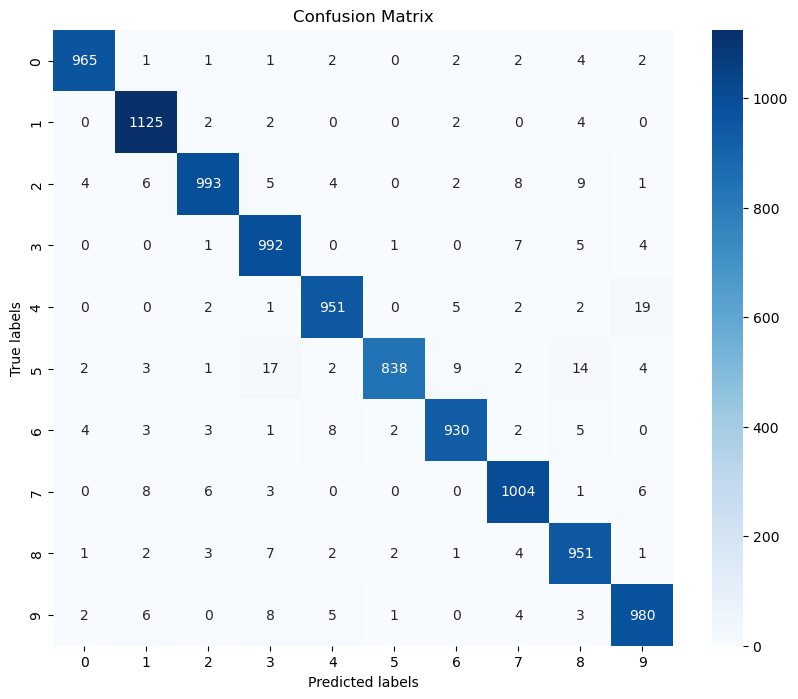

In [7]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 28ms/step


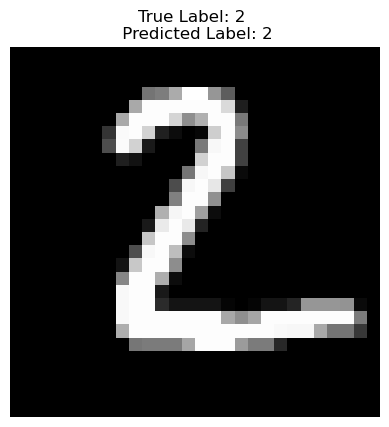

In [8]:
i = 1
test_image = test_images[i]
true_label = np.argmax(test_labels[1])

predictions = model.predict(test_image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(predictions)

# Display the test image along with the true and predicted labels
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()